# Assignment on Linear regression 

### Importing and Understanding Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Importing statsmodel for model building 
import statsmodels.api as sm 
# Importing statsmodel to calculate "VIF"
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Importing Data
data = pd.read_csv(r'C:\Users\ARUN\Downloads\linear+regreesion+Assigment\day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Performing EDA on given data

In [4]:
data.shape

(730, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Cleaning the given data

In [7]:
# Checking missing values
round(100*(data.isnull().sum()/len(data.index)), 2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
# Dropping unnecessary  collumn in given data
data.drop(['instant','dteday','casual','temp', 'registered'],axis=1, inplace=True)

In [9]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


#### Visualising Numeric Variables

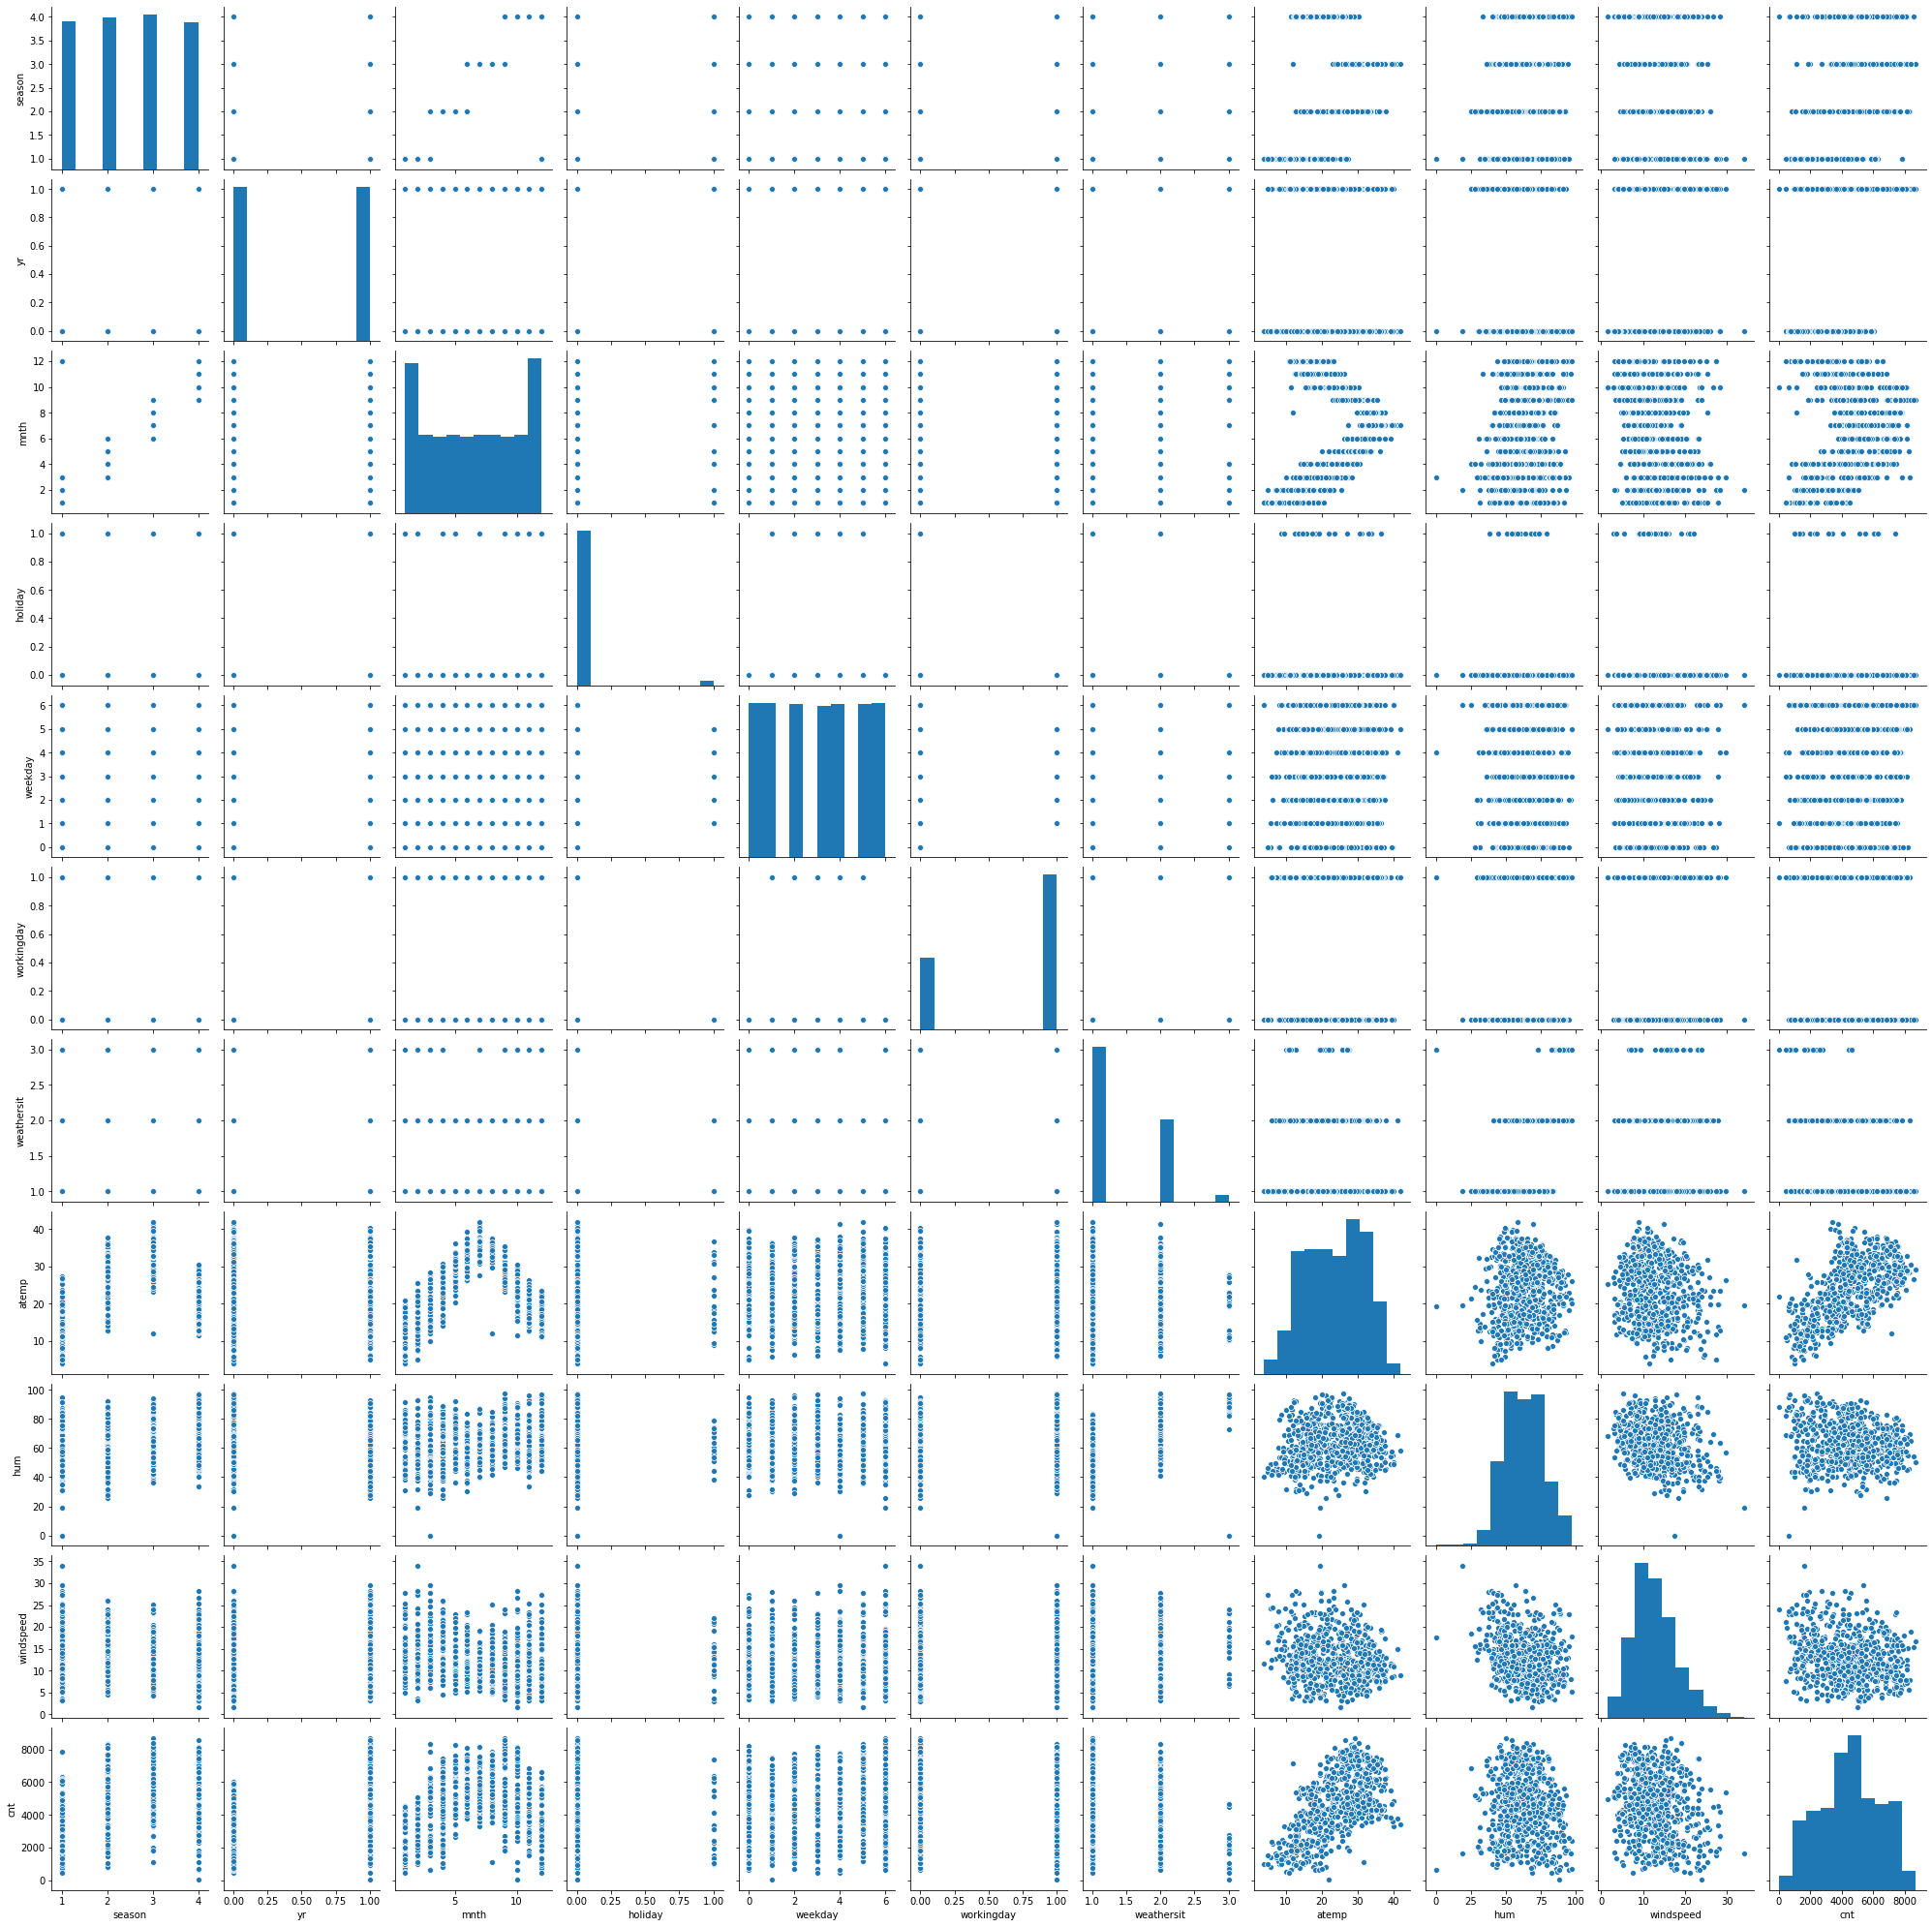

In [10]:
sns.pairplot(data)
plt.show()

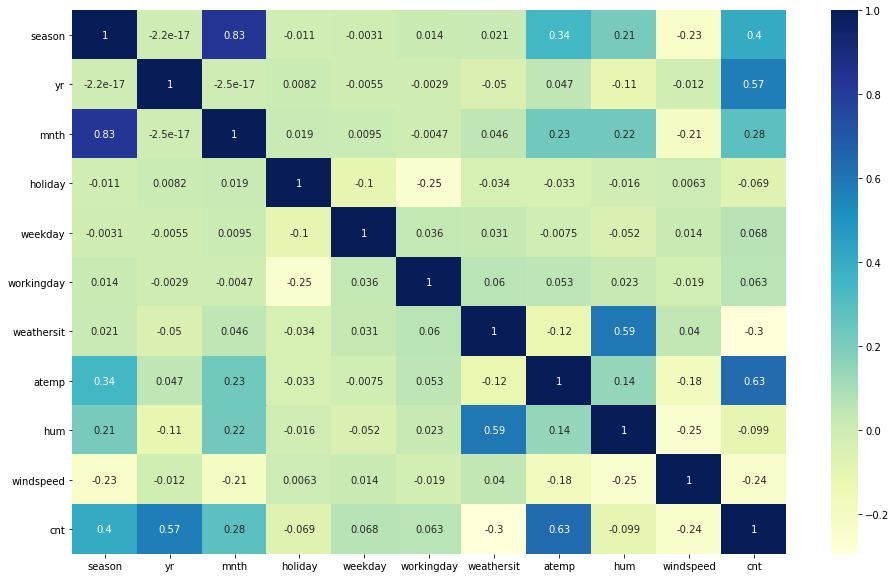

In [11]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

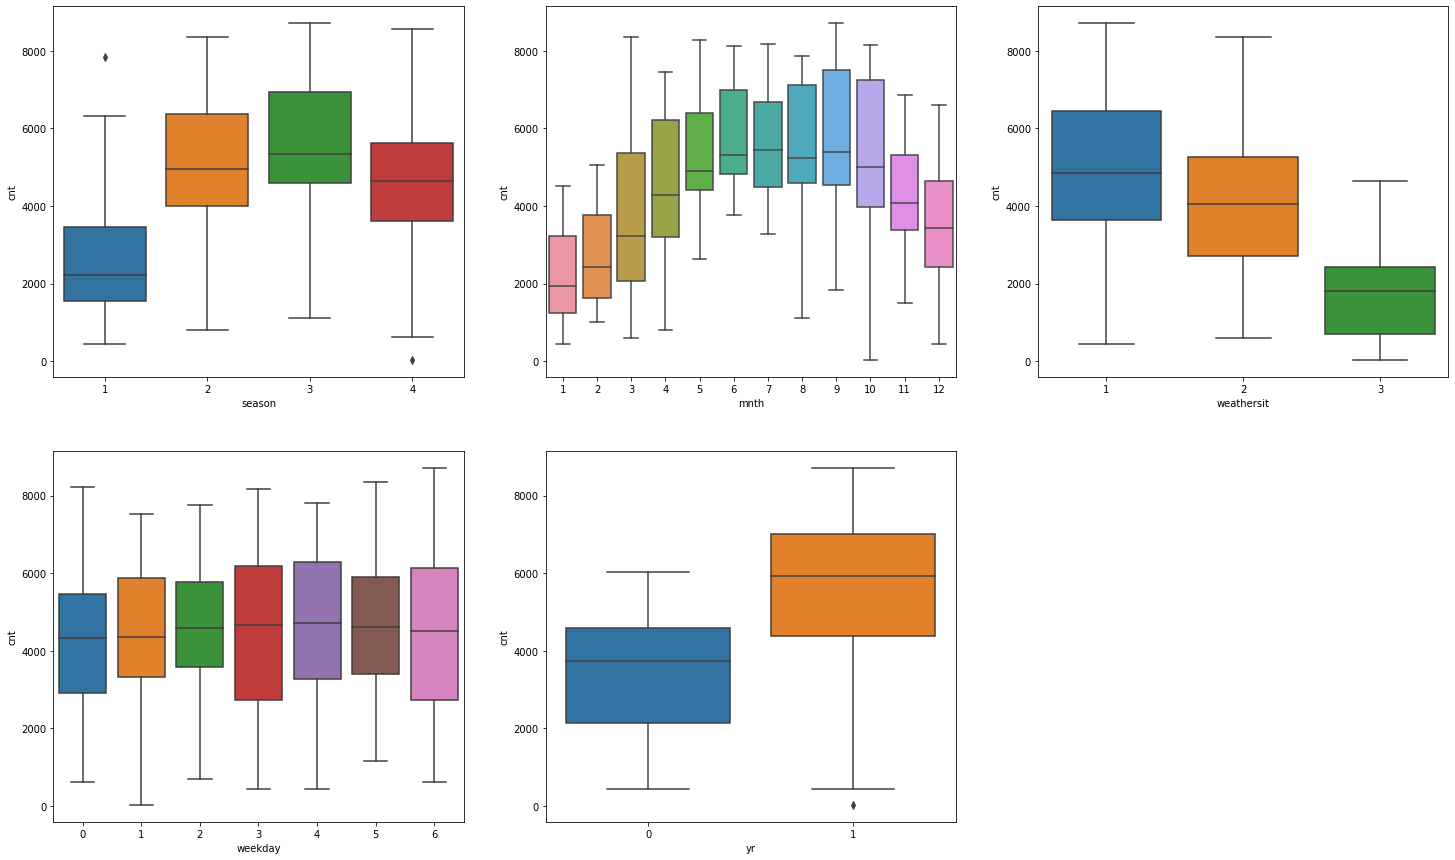

In [12]:
plt.figure(figsize=(25, 15))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.show()

### Preparing the data

In [13]:
# List of variables to map
list0 = ['season']
# Defining the map function
data[list0] = data[list0].apply(lambda x : x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))

In [14]:
list1 =  ['weekday']

data[list1] = data[list1].apply(lambda x : x.map({ 6: 'sat', 0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed' ,4: 'thu' ,5: 'fri'}))

In [15]:
list2 =  ['mnth']

data[list2] = data[list2].apply(lambda x : x.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep',10:'oct',11:'nov',12:'dec'}))

In [16]:
list3 =  ['weathersit']

data[list3] = data[list3].apply(lambda x : x.map({1:'Clear', 2:'Mist + Cloudy', 3:'Light Snow',4:'Heavy Rain + Mist + Snow'}))
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,11.46350,43.6957,12.522300,1600


### Dummy Variables

In [17]:
# Let's creat dummy vriables and drop the first column of dummy data using 'drop_first = True'
season = pd.get_dummies(data['season'], drop_first = True)
weekday= pd.get_dummies(data['weekday'], drop_first = True)
mnth= pd.get_dummies(data['mnth'], drop_first = True)
weathersit= pd.get_dummies(data['weathersit'], drop_first = True)
# Add the results to the original dataframe
data = pd.concat([data, season,weekday,mnth,weathersit], axis = 1)

# Now let's see the head of our dataframe.
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,jan,jul,jun,mar,may,nov,oct,sep,Light Snow,Mist + Cloudy
0,spring,0,jan,0,sat,0,Mist + Cloudy,18.18125,80.5833,10.749882,...,1,0,0,0,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,Mist + Cloudy,17.68695,69.6087,16.652113,...,1,0,0,0,0,0,0,0,0,1
2,spring,0,jan,0,mon,1,Clear,9.47025,43.7273,16.636703,...,1,0,0,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,10.60610,59.0435,10.739832,...,1,0,0,0,0,0,0,0,0,0
4,spring,0,jan,0,wed,1,Clear,11.46350,43.6957,12.522300,...,1,0,0,0,0,0,0,0,0,0


In [18]:
# Drop original collumn as we have created the dummies for it
data.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

data.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,jan,jul,jun,mar,may,nov,oct,sep,Light Snow,Mist + Cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,1,0,0,0,0,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

In [19]:
# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
# Apply scaler() to  the columns 'atemp','hum' and 'windspeed' variables
num_vars = ['atemp' ,'hum', 'windspeed']
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,jan,jul,jun,mar,may,nov,oct,sep,Light Snow,Mist + Cloudy
653,1,0,1,0.501133,0.575354,0.300794,7534,0,0,1,...,0,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,7216,0,0,0,...,0,1,0,0,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1796,1,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,4220,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### Dividing into X and Y sets for the model building

In [21]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building the model

### RFE
Recursive feature elimination

In [22]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [23]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 13),
 ('aug', False, 6),
 ('dec', True, 1),
 ('feb', False, 3),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 7),
 ('mar', False, 14),
 ('may', False, 4),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

In [24]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'spring', 'winter', 'sat',
       'dec', 'jan', 'jul', 'nov', 'sep', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [25]:
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'mon', 'sun', 'thu', 'tue', 'wed', 'aug', 'feb',
       'jun', 'mar', 'may', 'oct'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [26]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [27]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)

In [28]:
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [29]:
# The summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          9.67e-187
Time:                        21:08:00   Log-Likelihood:                -4116.9
No. Observations:                 510   AIC:                             8266.
Df Residuals:                     494   BIC:                             8334.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3204.7688    278.590     11.504      0.000    2657.401    3752.136
yr             2021.7452     70.963     28.490      0.000    1882.319    2161.171
holiday        -731.1442    225.465     -3.243      0.001   -1174.133    -288.156
atemp          3885.1378    302.922     12.826      0.000    3289.963    4480.313
hum           -1283.7098    331.391     -3.874      0.000   -1934.819    -632.600
windspeed     -1470.3591    226.291     -6.498      0.000   -1914.970   -1025.748
spring         -929.9243    133.336     -6.974      0.000   -1191.899    -667.949
winter          575.0151    122.260      4.703      0.000     334.801     815.230
sat             158.0845     97.183      1.627      0.104     -32.859     349.028
dec            -421.3898    150.989     -2.791      0.005    -718.049    -124.731
jan            -447.8580    157.925     -2.836      0.005    -758.145    -137.571
jul            -589.9380    149.906     -3.935      0.000    -884.471    -295.405
nov            -436.1798    162.216     -2.689      0.007    -754.897    -117.462
sep             508.9957    135.705      3.751      0.000     242.365     775.627
Light Snow    -2176.5663    232.030     -9.381      0.000   -2632.453   -1720.679
Mist + Cloudy  -506.1352     92.016     -5.501      0.000    -686.926    -325.345
==============================================================================
Omnibus:                       73.887   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.568
Skew:                          -0.724   Prob(JB):                     9.28e-43
Kurtosis:                       5.648   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`sat` is insignificant in presence of other variables; can be dropped

In [30]:
X_train_new = X_train_rfe.drop(["sat"], axis = 1)

####  Rebuilding the model without `sat`

In [31]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.58e-187
Time:                        21:08:00   Log-Likelihood:                -4118.3
No. Observations:                 510   AIC:                             8267.
Df Residuals:                     495   BIC:                             8330.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3241.9087    278.114     11.657      0.000    2695.479    3788.338
yr             2017.6179     71.035     28.403      0.000    1878.050    2157.186
holiday        -756.6766    225.292     -3.359      0.001   -1199.322    -314.031
atemp          3885.5880    303.425     12.806      0.000    3289.427    4481.749
hum           -1312.9171    331.454     -3.961      0.000   -1964.147    -661.687
windspeed     -1457.7266    226.533     -6.435      0.000   -1902.812   -1012.641
spring         -929.6702    133.557     -6.961      0.000   -1192.079    -667.261
winter          579.3828    122.434      4.732      0.000     338.828     819.937
dec            -412.4515    151.139     -2.729      0.007    -709.405    -115.498
jan            -442.6227    158.154     -2.799      0.005    -753.359    -131.886
jul            -587.2829    150.147     -3.911      0.000    -882.286    -292.280
nov            -439.3875    162.473     -2.704      0.007    -758.609    -120.166
sep             512.2263    135.916      3.769      0.000     245.182     779.270
Light Snow    -2164.1938    232.290     -9.317      0.000   -2620.591   -1707.797
Mist + Cloudy  -500.6207     92.106     -5.435      0.000    -681.588    -319.653
==============================================================================
Omnibus:                       68.422   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.422
Skew:                          -0.657   Prob(JB):                     2.00e-41
Kurtosis:                       5.663   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'dec', 'jan', 'jul', 'nov', 'sep', 'Light Snow',
       'Mist + Cloudy'],
      dtype='object')

### Checking VIF

In [33]:
vif = pd.DataFrame()
X = X_train_new 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.33
3,atemp,3.39
6,spring,2.69
7,winter,2.30
4,hum,1.91
11,nov,1.70
9,jan,1.65
14,Mist + Cloudy,1.57
8,dec,1.44
10,jul,1.30


`const` is having more VIF value (>5%) so it can me droped 

In [34]:
X_train_new1 = X_train_lm.drop(["const"], axis = 1)

#### Rebuilding the model without `const`

In [35]:
X_train_lm = sm.add_constant(X_train_new1)
lm = sm.OLS(y_train,X_train_lm).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.58e-187
Time:                        21:08:00   Log-Likelihood:                -4118.3
No. Observations:                 510   AIC:                             8267.
Df Residuals:                     495   BIC:                             8330.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3241.9087    278.114     11.657      0.000    2695.479    3788.338
yr             2017.6179     71.035     28.403      0.000    1878.050    2157.186
holiday        -756.6766    225.292     -3.359      0.001   -1199.322    -314.031
atemp          3885.5880    303.425     12.806      0.000    3289.427    4481.749
hum           -1312.9171    331.454     -3.961      0.000   -1964.147    -661.687
windspeed     -1457.7266    226.533     -6.435      0.000   -1902.812   -1012.641
spring         -929.6702    133.557     -6.961      0.000   -1192.079    -667.261
winter          579.3828    122.434      4.732      0.000     338.828     819.937
dec            -412.4515    151.139     -2.729      0.007    -709.405    -115.498
jan            -442.6227    158.154     -2.799      0.005    -753.359    -131.886
jul            -587.2829    150.147     -3.911      0.000    -882.286    -292.280
nov            -439.3875    162.473     -2.704      0.007    -758.609    -120.166
sep             512.2263    135.916      3.769      0.000     245.182     779.270
Light Snow    -2164.1938    232.290     -9.317      0.000   -2620.591   -1707.797
Mist + Cloudy  -500.6207     92.106     -5.435      0.000    -681.588    -319.653
==============================================================================
Omnibus:                       68.422   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.422
Skew:                          -0.657   Prob(JB):                     2.00e-41
Kurtosis:                       5.663   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
X_train_new1.columns

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'spring', 'winter', 'dec',
       'jan', 'jul', 'nov', 'sep', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

### Checking VIF

In [37]:
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.08
2,atemp,16.83
4,windspeed,4.00
6,winter,2.93
5,spring,2.89
13,Mist + Cloudy,2.26
0,yr,2.06
10,nov,1.82
8,jan,1.75
7,dec,1.54


#### dropping the 'hum' due high vif value

In [38]:
X_train_new2 = X_train_new1.drop(["hum"], axis = 1)

####  Rebuilding the model without `hum`

In [39]:
X_train_lm = sm.add_constant(X_train_new2)
lm = sm.OLS(y_train,X_train_lm).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.95e-185
Time:                        21:08:01   Log-Likelihood:                -4126.3
No. Observations:                 510   AIC:                             8281.
Df Residuals:                     496   BIC:                             8340.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2569.6203    223.560     11.494      0.000    2130.378    3008.862
yr             2048.9359     71.632     28.604      0.000    1908.197    2189.675
holiday        -765.6167    228.592     -3.349      0.001   -1214.745    -316.489
atemp          3578.6823    297.679     12.022      0.000    2993.815    4163.550
windspeed     -1232.8270    222.527     -5.540      0.000   -1670.038    -795.616
spring         -952.6790    135.392     -7.036      0.000   -1218.692    -686.666
winter          504.5409    122.746      4.110      0.000     263.376     745.706
dec            -461.5599    152.844     -3.020      0.003    -761.862    -161.258
jan            -488.6532    160.045     -3.053      0.002    -803.104    -174.203
jul            -519.4809    151.361     -3.432      0.001    -816.868    -222.094
nov            -435.1542    164.858     -2.640      0.009    -759.060    -111.248
sep             484.0269    137.725      3.514      0.000     213.430     754.623
Light Snow    -2530.9387    216.173    -11.708      0.000   -2955.666   -2106.211
Mist + Cloudy  -710.5469     76.439     -9.296      0.000    -860.731    -560.363
==============================================================================
Omnibus:                       71.564   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.324
Skew:                          -0.692   Prob(JB):                     1.05e-42
Kurtosis:                       5.680   Cond. No.                         15.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.57
3,windspeed,3.95
5,winter,2.55
4,spring,2.35
0,yr,2.06
9,nov,1.80
7,jan,1.65
12,Mist + Cloudy,1.53
6,dec,1.46
8,jul,1.35


#### dropping the variable with low p value and low vif value ' nov' 

In [41]:
X_train_new3 = X_train_new2.drop(["nov"], axis = 1)

####  Rebuilding the model without `nov`

In [42]:
X_train_lm = sm.add_constant(X_train_new3)
lm = sm.OLS(y_train,X_train_lm).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.41e-185
Time:                        21:08:01   Log-Likelihood:                -4129.8
No. Observations:                 510   AIC:                             8286.
Df Residuals:                     497   BIC:                             8341.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2457.9739    220.836     11.130      0.000    2024.086    2891.862
yr             2048.8373     72.060     28.432      0.000    1907.257    2190.418
holiday        -836.7401    228.357     -3.664      0.000   -1285.404    -388.076
atemp          3740.7097    293.025     12.766      0.000    3164.990    4316.430
windspeed     -1229.0589    223.854     -5.490      0.000   -1668.875    -789.242
spring         -921.6195    135.687     -6.792      0.000   -1188.211    -655.028
winter          352.8318    109.107      3.234      0.001     138.464     567.200
dec            -310.3577    142.552     -2.177      0.030    -590.437     -30.278
jan            -443.0823    160.064     -2.768      0.006    -757.567    -128.597
jul            -542.8991    152.005     -3.572      0.000    -841.550    -244.248
sep             518.9863    137.907      3.763      0.000     248.033     789.940
Light Snow    -2489.5940    216.895    -11.478      0.000   -2915.738   -2063.449
Mist + Cloudy  -702.2076     76.831     -9.140      0.000    -853.161    -551.254
==============================================================================
Omnibus:                       63.315   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.929
Skew:                          -0.636   Prob(JB):                     3.08e-35
Kurtosis:                       5.421   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.54
3,windspeed,3.91
4,spring,2.35
0,yr,2.06
5,winter,1.64
7,jan,1.64
11,Mist + Cloudy,1.53
8,jul,1.35
6,dec,1.29
9,sep,1.20


#### dropping the variable with low p value and low vif value ' dec' 

In [44]:
X_train_new4 = X_train_new3.drop(["dec"], axis = 1)

####  Rebuilding the model without `dec`

In [45]:
X_train_lm = sm.add_constant(X_train_new4)
lm = sm.OLS(y_train,X_train_lm).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          5.75e-185
Time:                        21:08:01   Log-Likelihood:                -4132.2
No. Observations:                 510   AIC:                             8288.
Df Residuals:                     498   BIC:                             8339.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2356.1727    216.638     10.876      0.000    1930.535    2781.810
yr             2049.9634     72.329     28.342      0.000    1907.857    2192.070
holiday        -820.5969    229.092     -3.582      0.000   -1270.703    -370.491
atemp          3867.7620    288.231     13.419      0.000    3301.463    4434.061
windspeed     -1171.0017    223.093     -5.249      0.000   -1609.321    -732.682
spring         -938.0965    135.984     -6.899      0.000   -1205.269    -670.924
winter          305.1804    107.290      2.844      0.005      94.384     515.977
jan            -371.2179    157.210     -2.361      0.019    -680.095     -62.341
jul            -561.4593    152.334     -3.686      0.000    -860.756    -262.162
sep             529.8752    138.333      3.830      0.000     258.087     801.664
Light Snow    -2463.3229    217.371    -11.332      0.000   -2890.400   -2036.246
Mist + Cloudy  -701.7599     77.118     -9.100      0.000    -853.278    -550.242
==============================================================================
Omnibus:                       59.159   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.706
Skew:                          -0.604   Prob(JB):                     3.78e-32
Kurtosis:                       5.313   Cond. No.                         14.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.54
3,windspeed,3.91
4,spring,2.24
0,yr,2.06
6,jan,1.60
10,Mist + Cloudy,1.53
5,winter,1.40
7,jul,1.35
8,sep,1.20
9,Light Snow,1.08


In [47]:
X_train_new5 = X_train_new4.drop(["jan"], axis = 1)

In [48]:
X_train_lm = sm.add_constant(X_train_new5)
lm = sm.OLS(y_train,X_train_lm).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          5.68e-185
Time:                        21:08:02   Log-Likelihood:                -4135.1
No. Observations:                 510   AIC:                             8292.
Df Residuals:                     499   BIC:                             8339.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2232.8353    211.209     10.572      0.000    1817.867    2647.804
yr             2043.5716     72.609     28.145      0.000    1900.916    2186.228
holiday        -826.4849    230.126     -3.591      0.000   -1278.621    -374.349
atemp          4034.9123    280.682     14.375      0.000    3483.449    4586.376
windspeed     -1092.0189    221.580     -4.928      0.000   -1527.364    -656.674
spring        -1020.5618    132.024     -7.730      0.000   -1279.953    -761.171
winter          338.6917    106.834      3.170      0.002     128.793     548.591
jul            -590.9947    152.514     -3.875      0.000    -890.644    -291.345
sep             521.9788    138.925      3.757      0.000     249.028     794.930
Light Snow    -2450.4616    218.297    -11.225      0.000   -2879.356   -2021.568
Mist + Cloudy  -710.1585     77.389     -9.176      0.000    -862.207    -558.110
==============================================================================
Omnibus:                       58.762   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.570
Skew:                          -0.593   Prob(JB):                     1.49e-32
Kurtosis:                       5.343   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.51
3,windspeed,3.90
0,yr,2.05
4,spring,1.63
9,Mist + Cloudy,1.52
5,winter,1.40
6,jul,1.35
7,sep,1.20
8,Light Snow,1.08
1,holiday,1.04


## Residual Analysis of the train data

In [50]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

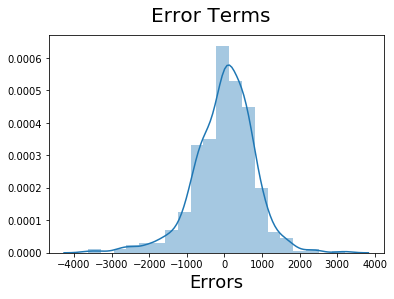

In [51]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

#### Applying the scaling on the test sets

In [52]:
num_vars = ['atemp' ,'hum', 'windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [53]:
y_test = df_test.pop('cnt')
X_test = df_test

In [54]:
#  using our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [55]:
# Making predictions
y_pred = lm.predict(X_test_new)


In [60]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          5.68e-185
Time:                        21:54:58   Log-Likelihood:                -4135.1
No. Observations:                 510   AIC:                             8292.
Df Residuals:                     499   BIC:                             8339.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2232.8353    211.209     10.572

## Model Evaluation

Text(0, 0.5, 'y_pred')

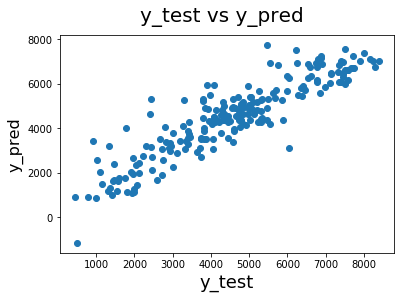

In [57]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### Which variables are significant in predicting the demand for shared bikes
 #### The variables which significant to predicting are 'yr', 'holiday', 'atemp', 'windspeed', 'spring', 'winter', 'jul', 'sep', 'Light Snow', 'Mist + Cloudy'

### How well those variables describe the bike demands
#### We can see that the equation of our best fitted line is: 
`cnt = 2043.572 x yr-826.485 x holiday+4034.912 x atemp-1092.019 x windspeed-1020.562 x spring+338.698 x winter-590.998 x jul+521.979 x sep-2450.465 x Light Snow-710.159 x Mist + Cloudy`
